<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

The Board of Education for the state of California would like to allocate resources to districts in need pertaining to student success in math. The project aims to identify the California school districts with the lowest student performances in mathematics by using ACT and SAT data. Those school districts will be looked at further to determine what resources or funds would be beneficial in order to increase student success in mathematics.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

California plans to change the math course structure from varying course levels (on-level, advanced, honors) to one course level serving all students for reach mathematics subject. ([*source*](https://www.washingtonpost.com/education/2021/06/04/california-math-class-detrack-race-equity/)) Having various levels of students in one class can be challenging.  Providing appropriate learning materials that will support students of varying levels in one class will be necessary.  

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Utilizing the SAT and ACT Mathematics score averages of school districts, the Board of educacation hopes to provide appropriate resources for underperforming districts.  The goal being to train teachers on these resources prior to the implementation of the new mathematics framework. ([*read more about this here*](https://www.cde.ca.gov/ci/ma/cf/))

### Datasets

* ACT 2019 score report for California. This report highlights the school, district, and county averages for each ACT section: English, Mathematics, Reading, and Science. The averages, as well as the composite scores, are on a scale of 1 - 36. ([`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School)
* SAT 2019 score report for California. This report highlights the school, district, and county numbers over benchmark. Instead of providing average, the state provides the number of students who have surpassed the benchmark values. For this project's purposes, the 12th grade math numbers will be used as only 12th grade math numbers are available for the ACT data and this will keep the datat consistent. The benchmark for 12th grade math is 530. Therefore, the numbers listed are the number of students who have surpassed the benchmark. ([`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School)

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

California's mathematics framework has been heavily discussed in the news due to pushback from parents and the larger conversation that it has prompted related to equity and inclusion. By removing the tracking of classes, the on-level, advanced, honors, etc., there will be more diversity in each math class. For those that are proponents for the "de-tracking," this move will help too "unravel racial segregation". ([*Washington Post source*](https://www.washingtonpost.com/education/2021/06/04/california-math-class-detrack-race-equity/)) ([*NYT source*](https://www.nytimes.com/2021/11/10/us/california-math-curriculum.html))


### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
numbers = [10, 12, 19, 33, 22, 19, 25, 26]

In [2]:
def average(num):
    return sum(num)/len(num)

average(numbers)

20.75

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
def stddev(num):
    diff = []
    for i in num:
        diff.append(i - average(num))
    numerator = sum([delta ** 2 for delta in diff])
    return ((numerator)/len(num)) ** 0.5

stddev(numbers)

7.031180555212616

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [4]:
symbol_list=['50%', '30%', '15%', '26%', '100%', '30.14%']

In [5]:
def sym_to_num(sym):
    return [float(s.replace('%', ''))/100 for s in sym]

sym_to_num(symbol_list)

[0.5, 0.3, 0.15, 0.26, 1.0, 0.3014]

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

In order to download tables, dataframe_image was installed. ([*source*](https://predictivehacks.com/?all-tips=save-a-pandas-dataframe-as-an-image))

In [6]:
#pip install dataframe-image

#If you want to be able to save images of dataframes, uncomment this.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import dataframe_image as dfi

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [8]:
sat_2019_ca = pd.read_csv('../data/sat_2019_ca.csv')

In [9]:
sat_2019_ca.head(5)

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


In [10]:
act_2019_ca = pd.read_csv('../data/act_2019_ca.csv')

In [11]:
act_2019_ca.head(5)

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


In [12]:
act_2019_ca.shape

(2310, 18)

In [13]:
sat_2019_ca.shape

(2580, 26)

Schools where less than 15 students have taken the test are indicated with an asterisk (*). Below all asterik's are being replaced with NaN to keep all missing data consistent.

In [14]:
sat_2019_ca.replace(to_replace = '*', value = np.nan, inplace=True)
sat_2019_ca

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5.772678e+13,57.0,5772678.0,0.0,D,NaN,Davis Joint Unified,Yolo,717.0,307.0,...,454,95.78,428,90.30,268,87.30,421,88.82,2018-19,NaN
2576,7.000000e+12,7.0,700000.0,0.0,C,NaN,NaN,Contra Costa,14593.0,5412.0,...,4583,88.87,3933,76.27,2721,50.28,3853,74.71,2018-19,NaN
2577,1.700000e+13,17.0,1700000.0,0.0,C,NaN,NaN,Lake,667.0,167.0,...,94,74.60,50,39.68,65,38.92,47,37.30,2018-19,NaN
2578,3.800000e+13,38.0,3800000.0,0.0,C,NaN,NaN,San Francisco,4447.0,2256.0,...,1702,83.35,1566,76.69,1248,55.32,1482,72.58,2018-19,NaN


In [15]:
sat_2019_ca.notnull()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,True,False
1,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,True,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2576,True,True,True,True,True,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2577,True,True,True,True,True,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2578,True,True,True,True,True,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,False


Schools where less than 15 students have taken the test are indicated with an asterisk (*). Below all asterik's are being replaced with NaN to keep all missing data consistent.

In [16]:
act_2019_ca.replace(to_replace = '*', value = np.nan, inplace=True)
act_2019_ca

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,5.810588e+13,58.0,5810587.0,5830112.0,S,Yuba County Career Preparatory Charter,Yuba County Office of Education,Yuba,102.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2306,3.667959e+13,36.0,3667959.0,3638509.0,S,Yucaipa High,Yucaipa-Calimesa Joint Unified,San Bernardino,628.0,61.0,24,22,22,22,40,65.57,2018-19,NaN
2307,3.667777e+13,36.0,3667777.0,3638616.0,S,Yucca Valley High,Morongo Unified,San Bernardino,314.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2308,3.667850e+13,36.0,3667850.0,3630530.0,S,Zupanic High,Rialto Unified,San Bernardino,47.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN


In [17]:
act_2019_ca.notnull()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False
1,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False
2,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False
2306,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
2307,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False
2308,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False


Before cleaning the rest of the data, columns that will not be used in the analysis will be removed. Only 12th grade math data will be used from the SAT as only 12th grade math data is available for the ACT. This will keep the data consistent and comparable.

In [18]:
sat_2019_ca.drop(['CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'NumERWBenchmark12', 'PctERWBenchmark12', 'Enroll11', 'NumTSTTakr11', 'NumERWBenchmark11', 'PctERWBenchmark11', 'NumMathBenchmark11', 'PctMathBenchmark11', 'TotNumBothBenchmark12', 'PctBothBenchmark12', 'TotNumBothBenchmark11', 'PctBothBenchmark11', 'Year', 'Unnamed: 25'], axis=1, inplace=True)

In [19]:
sat_2019_ca

,SName,DName,CName,Enroll12,NumTSTTakr12,NumMathBenchmark12,PctMathBenchmark12
0,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,NaN
1,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,NaN,NaN
2,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,14,13.73
3,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,18,15.93
4,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,NaN,NaN
...,...,...,...,...,...,...,...
2575,NaN,Davis Joint Unified,Yolo,717.0,307.0,274,89.25
2576,NaN,NaN,Contra Costa,14593.0,5412.0,2814,52.00
2577,NaN,NaN,Lake,667.0,167.0,71,42.51
2578,NaN,NaN,San Francisco,4447.0,2256.0,1380,61.17


In [20]:
sat_2019_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SName               1982 non-null   object 
 1   DName               2521 non-null   object 
 2   CName               2579 non-null   object 
 3   Enroll12            2579 non-null   float64
 4   NumTSTTakr12        2579 non-null   float64
 5   NumMathBenchmark12  1722 non-null   object 
 6   PctMathBenchmark12  1722 non-null   object 
dtypes: float64(2), object(5)
memory usage: 141.2+ KB


There is a problem here because it is expected that all columns from Enroll 12 through PctMathBenchmark12 should be floats, but many are rendering as objects.
Below this is fixed.

In [21]:
sat_2019_ca['PctMathBenchmark12'].sort_values(ascending=False)

364     98.98
1747    98.75
1736    96.50
1102    95.45
144     95.30
        ...  
2570      NaN
2571      NaN
2572      NaN
2573      NaN
2579      NaN
Name: PctMathBenchmark12, Length: 2580, dtype: object

The data seems fine, so to fix this the column will be set equal to itself and forced to be a float Dtype.

In [22]:
sat_2019_ca['PctMathBenchmark12'] = sat_2019_ca['PctMathBenchmark12'].astype(float)

In [23]:
#Is this necessary?

sat_2019_ca['NumMathBenchmark12'].value_counts()

6       32
9       31
10      30
15      30
17      29
        ..
772      1
655      1
971      1
728      1
2814     1
Name: NumMathBenchmark12, Length: 356, dtype: int64

Again, this looks to be fine so this column will be set equal to itself and force to be a float DType.

In [24]:
sat_2019_ca['NumMathBenchmark12'] = sat_2019_ca['NumMathBenchmark12'].astype(float)

In [25]:
sat_2019_ca

,SName,DName,CName,Enroll12,NumTSTTakr12,NumMathBenchmark12,PctMathBenchmark12
0,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,NaN
1,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,NaN,NaN
2,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,14.0,13.73
3,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,18.0,15.93
4,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,NaN,NaN
...,...,...,...,...,...,...,...
2575,NaN,Davis Joint Unified,Yolo,717.0,307.0,274.0,89.25
2576,NaN,NaN,Contra Costa,14593.0,5412.0,2814.0,52.00
2577,NaN,NaN,Lake,667.0,167.0,71.0,42.51
2578,NaN,NaN,San Francisco,4447.0,2256.0,1380.0,61.17


In [26]:
sat_2019_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SName               1982 non-null   object 
 1   DName               2521 non-null   object 
 2   CName               2579 non-null   object 
 3   Enroll12            2579 non-null   float64
 4   NumTSTTakr12        2579 non-null   float64
 5   NumMathBenchmark12  1722 non-null   float64
 6   PctMathBenchmark12  1722 non-null   float64
dtypes: float64(4), object(3)
memory usage: 141.2+ KB


Next, the values for PctMathBenchmark12 will be changed to percentages.

In [27]:
sat_2019_ca['PctMathBenchmark12'] = sat_2019_ca['PctMathBenchmark12']/100

In [28]:
sat_2019_ca

,SName,DName,CName,Enroll12,NumTSTTakr12,NumMathBenchmark12,PctMathBenchmark12
0,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,NaN
1,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,NaN,NaN
2,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,14.0,0.1373
3,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,18.0,0.1593
4,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,NaN,NaN
...,...,...,...,...,...,...,...
2575,NaN,Davis Joint Unified,Yolo,717.0,307.0,274.0,0.8925
2576,NaN,NaN,Contra Costa,14593.0,5412.0,2814.0,0.5200
2577,NaN,NaN,Lake,667.0,167.0,71.0,0.4251
2578,NaN,NaN,San Francisco,4447.0,2256.0,1380.0,0.6117


Now, the ACT data will be cleaned including columns removed and data types checked.

In [29]:
act_2019_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CDS          2309 non-null   float64
 1   CCode        2309 non-null   float64
 2   CDCode       2309 non-null   float64
 3   SCode        1787 non-null   float64
 4   RType        2309 non-null   object 
 5   SName        1729 non-null   object 
 6   DName        2251 non-null   object 
 7   CName        2309 non-null   object 
 8   Enroll12     2309 non-null   float64
 9   NumTstTakr   2309 non-null   float64
 10  AvgScrRead   1421 non-null   object 
 11  AvgScrEng    1421 non-null   object 
 12  AvgScrMath   1421 non-null   object 
 13  AvgScrSci    1421 non-null   object 
 14  NumGE21      1421 non-null   object 
 15  PctGE21      1421 non-null   object 
 16  Year         2309 non-null   object 
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(7), object(11)
memory usage: 325.0+ K

In [30]:
act_2019_ca.drop(['CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'AvgScrRead', 'AvgScrEng', 'AvgScrSci', 'NumGE21', 'PctGE21', 'Year', 'Unnamed: 17'], axis=1, inplace=True)

In [31]:
act_2019_ca

,SName,DName,CName,Enroll12,NumTstTakr,AvgScrMath
0,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN
1,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN
2,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN
3,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,22
4,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,23
...,...,...,...,...,...,...
2305,Yuba County Career Preparatory Charter,Yuba County Office of Education,Yuba,102.0,0.0,NaN
2306,Yucaipa High,Yucaipa-Calimesa Joint Unified,San Bernardino,628.0,61.0,22
2307,Yucca Valley High,Morongo Unified,San Bernardino,314.0,11.0,NaN
2308,Zupanic High,Rialto Unified,San Bernardino,47.0,0.0,NaN


In [32]:
act_2019_ca['AvgScrMath'].value_counts()

22    157
19    151
18    137
20    134
21    133
23    131
17    111
25    110
24    109
26     62
16     58
27     50
28     30
29     16
15     15
30     10
32      3
14      2
31      2
Name: AvgScrMath, dtype: int64

This looks like it is an integer but it is coming through as an object. This column will be set equal to itself and forced to be a DType float.

In [33]:
act_2019_ca['AvgScrMath'] = act_2019_ca['AvgScrMath'].astype(float)

In [34]:
act_2019_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SName       1729 non-null   object 
 1   DName       2251 non-null   object 
 2   CName       2309 non-null   object 
 3   Enroll12    2309 non-null   float64
 4   NumTstTakr  2309 non-null   float64
 5   AvgScrMath  1421 non-null   float64
dtypes: float64(3), object(3)
memory usage: 108.4+ KB


Now each column will be renamed to be lowercase. All of the columns already contain no spaces, so these will be left as is.

In [35]:
sat_2019_ca.columns = sat_2019_ca.columns.str.lower()

In [36]:
sat_2019_ca

,sname,dname,cname,enroll12,numtsttakr12,nummathbenchmark12,pctmathbenchmark12
0,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,NaN
1,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,NaN,NaN
2,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,14.0,0.1373
3,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,18.0,0.1593
4,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,NaN,NaN
...,...,...,...,...,...,...,...
2575,NaN,Davis Joint Unified,Yolo,717.0,307.0,274.0,0.8925
2576,NaN,NaN,Contra Costa,14593.0,5412.0,2814.0,0.5200
2577,NaN,NaN,Lake,667.0,167.0,71.0,0.4251
2578,NaN,NaN,San Francisco,4447.0,2256.0,1380.0,0.6117


In [37]:
act_2019_ca.columns = act_2019_ca.columns.str.lower()

In [38]:
act_2019_ca

,sname,dname,cname,enroll12,numtsttakr,avgscrmath
0,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN
1,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN
2,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN
3,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,22.0
4,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,23.0
...,...,...,...,...,...,...
2305,Yuba County Career Preparatory Charter,Yuba County Office of Education,Yuba,102.0,0.0,NaN
2306,Yucaipa High,Yucaipa-Calimesa Joint Unified,San Bernardino,628.0,61.0,22.0
2307,Yucca Valley High,Morongo Unified,San Bernardino,314.0,11.0,NaN
2308,Zupanic High,Rialto Unified,San Bernardino,47.0,0.0,NaN


In [39]:
#Drop rows with no data on the entire row.
act_2019_ca = act_2019_ca.dropna(how = 'all')

In [40]:
#Drop rows with no data in the avgscrmath column
act_2019_ca = act_2019_ca.dropna(subset=['avgscrmath'])

In [41]:
act_2019_ca.groupby('dname').describe()

enroll12                                 \
                                  count        mean         std    min   
dname                                                                    
ABC Unified                         5.0  619.800000  596.693975  165.0   
Acalanes Union High                 5.0  557.400000  475.828015  319.0   
Alameda Unified                     3.0  538.333333  349.149443  233.0   
Albany City Unified                 2.0  301.500000    7.778175  296.0   
Alhambra Unified                    4.0  914.000000  660.528576  527.0   
...                                 ...         ...         ...    ...   
Woodland Joint Unified              3.0  486.666667  242.801016  343.0   
Yosemite Unified                    2.0  168.500000   47.376154  135.0   
Yreka Union High                    2.0  144.000000    8.485281  138.0   
Yuba City Unified                   3.0  600.333333  322.524934  394.0   
Yucaipa-Calimesa Joint Unified      2.0  683.500000   78.488853  628.0   

                                                              numtsttakr  \
                                   25%    50%     75%     max      count   
dname                                                                      
ABC Unified                     344.00  418.0  509.00  1663.0        5.0   
Acalanes Union High             340.00  353.0  367.00  1408.0        5.0   
Alameda Unified                 348.00  463.0  691.00   919.0        3.0   
Albany City Unified             298.75  301.5  304.25   307.0        2.0   
Alhambra Unified                566.00  613.5  961.50  1902.0        4.0   
...                                ...    ...     ...     ...        ...   
Woodland Joint Unified          346.50  350.0  558.50   767.0        3.0   
Yosemite Unified                151.75  168.5  185.25   202.0        2.0   
Yreka Union High                141.00  144.0  147.00   150.0        2.0   
Yuba City Unified               414.50  435.0  703.50   972.0        3.0   
Yucaipa-Calimesa Joint Unified  655.75  683.5  711.25   739.0        2.0   

                                            ...                avgscrmath  \
                                      mean  ...     75%    max      count   
dname                                       ...                             
ABC Unified                      86.400000  ...   93.00  216.0        5.0   
Acalanes Union High             215.200000  ...  161.00  539.0        5.0   
Alameda Unified                  97.333333  ...  124.00  155.0        3.0   
Albany City Unified              58.000000  ...   58.00   58.0        2.0   
Alhambra Unified                119.000000  ...  129.25  238.0        4.0   
...                                    ...  ...     ...    ...        ...   
Woodland Joint Unified           92.666667  ...  109.50  139.0        3.0   
Yosemite Unified                 35.000000  ...   36.00   37.0        2.0   
Yreka Union High                 38.000000  ...   38.00   38.0        2.0   
Yuba City Unified                77.000000  ...   87.50  116.0        3.0   
Yucaipa-Calimesa Joint Unified   61.000000  ...   61.00   61.0        2.0   

                                                                                
                                 mean       std   min    25%   50%   75%   max  
dname                                                                           
ABC Unified                     25.20  4.147288  20.0  22.00  26.0  28.0  30.0  
Acalanes Union High             27.20  1.303840  25.0  27.00  28.0  28.0  28.0  
Alameda Unified                 26.00  1.000000  25.0  25.50  26.0  26.5  27.0  
Albany City Unified             27.00  0.000000  27.0  27.00  27.0  27.0  27.0  
Alhambra Unified                24.25  2.500000  21.0  23.25  24.5  25.5  27.0  
...                               ...       ...   ...    ...   ...   ...   ...  
Woodland Joint Unified          19.00  1.000000  18.0  18.50  19.0  19.5  20.0  
Yosemite Unified                22.00  0

In [42]:
#Drop rows with no data on the entire row.
sat_2019_ca = sat_2019_ca.dropna(how = 'all')

In [43]:
#Drop rows with no data in the nummathbenchmark12 and dname columns.
sat_2019_ca = sat_2019_ca.dropna(subset=['nummathbenchmark12', 'dname'])

In [44]:
#The below will group by dname and then show summaries of count and mean for each variable.
sat_2019_ca.groupby('dname').agg(['count', 'mean'])

enroll12             numtsttakr12  \
                                      count        mean        count   
dname                                                                  
ABC Unified                               5  619.800000            5   
Acalanes Union High                       5  557.400000            5   
Acton-Agua Dulce Unified                  4  413.000000            4   
Alameda County Office of Education        2  127.000000            2   
Alameda Unified                           6  290.333333            6   
...                                     ...         ...          ...   
Woodland Joint Unified                    3  486.666667            3   
Yosemite Unified                          2  168.500000            2   
Yreka Union High                          2  144.000000            2   
Yuba City Unified                         3  600.333333            3   
Yucaipa-Calimesa Joint Unified            2  683.500000            2   

                                               nummathbenchmark12              \
                                          mean              count        mean   
dname                                                                           
ABC Unified                         252.000000                  5  167.800000   
Acalanes Union High                 189.200000                  5  157.200000   
Acton-Agua Dulce Unified             47.000000                  4   13.750000   
Alameda County Office of Education   64.000000                  2    9.500000   
Alameda Unified                     122.166667                  6   79.833333   
...                                        ...                ...         ...   
Woodland Joint Unified              148.666667                  3   64.666667   
Yosemite Unified                     53.500000                  2   25.500000   
Yreka Union High                     41.000000                  2   24.000000   
Yuba City Unified                   135.666667                  3   76.666667   
Yucaipa-Calimesa Joint Unified      227.000000                  2  135.000000   

                                   pctmathbenchmark12            
                                                count      mean  
dname                                                            
ABC Unified                                         5  0.672520  
Acalanes Union High                                 5  0.833780  
Acton-Agua Dulce Unified                            4  0.319325  
Alameda County Office of Education                  2  0.147650  
Alameda Unified                                     6  0.570617  
...                                               ...       ...  
Woodland Joint Unified                              3  0.433067  
Yosemite Unified                                    2  0.476850  
Yreka Union High                                    2  0.585400  
Yuba City Unified                                   3  0.560167  
Yucaipa-Calimesa Joint Unified                      2  0.594700  

[406 rows x 8 columns]

In [45]:
#Now this will be made permanent by resetting the index
sat_ca = sat_2019_ca.groupby('dname').agg(['count', 'mean']).reset_index()
sat_ca

dname enroll12             numtsttakr12  \
                                           count        mean        count   
0                           ABC Unified        5  619.800000            5   
1                   Acalanes Union High        5  557.400000            5   
2              Acton-Agua Dulce Unified        4  413.000000            4   
3    Alameda County Office of Education        2  127.000000            2   
4                       Alameda Unified        6  290.333333            6   
..                                  ...      ...         ...          ...   
401              Woodland Joint Unified        3  486.666667            3   
402                    Yosemite Unified        2  168.500000            2   
403                    Yreka Union High        2  144.000000            2   
404                   Yuba City Unified        3  600.333333            3   
405      Yucaipa-Calimesa Joint Unified        2  683.500000            2   

                nummathbenchmark12             pctmathbenchmark12            
           mean              count        mean              count      mean  
0    252.000000                  5  167.800000                  5  0.672520  
1    189.200000                  5  157.200000                  5  0.833780  
2     47.000000                  4   13.750000                  4  0.319325  
3     64.000000                  2    9.500000                  2  0.147650  
4    122.166667                  6   79.833333                  6  0.570617  
..          ...                ...         ...                ...       ...  
401  148.666667                  3   64.666667                  3  0.433067  
402   53.500000                  2   25.500000                  2  0.476850  
403   41.000000                  2   24.000000                  2  0.585400  
404  135.666667                  3   76.666667                  3  0.560167  
405  227.000000                  2  135.000000                  2  0.594700  

[406 rows x 9 columns]

In [46]:
#The below will group by dname and then show summaries of count and mean for each variable.
act_2019_ca.groupby('dname').agg(['count', 'mean'])

enroll12             numtsttakr              \
                                  count        mean      count        mean   
dname                                                                        
ABC Unified                           5  619.800000          5   86.400000   
Acalanes Union High                   5  557.400000          5  215.200000   
Alameda Unified                       3  538.333333          3   97.333333   
Albany City Unified                   2  301.500000          2   58.000000   
Alhambra Unified                      4  914.000000          4  119.000000   
...                                 ...         ...        ...         ...   
Woodland Joint Unified                3  486.666667          3   92.666667   
Yosemite Unified                      2  168.500000          2   35.000000   
Yreka Union High                      2  144.000000          2   38.000000   
Yuba City Unified                     3  600.333333          3   77.000000   
Yucaipa-Calimesa Joint Unified        2  683.500000          2   61.000000   

                               avgscrmath         
                                    count   mean  
dname                                             
ABC Unified                             5  25.20  
Acalanes Union High                     5  27.20  
Alameda Unified                         3  26.00  
Albany City Unified                     2  27.00  
Alhambra Unified                        4  24.25  
...                                   ...    ...  
Woodland Joint Unified                  3  19.00  
Yosemite Unified                        2  22.00  
Yreka Union High                        2  21.00  
Yuba City Unified                       3  22.00  
Yucaipa-Calimesa Joint Unified          2  22.00  

[353 rows x 6 columns]

In [47]:
#Now this will be made permanent by resetting the index
act_ca = act_2019_ca.groupby('dname').agg(['count', 'mean']).reset_index()

These are multi-level index columns, so I will join them together.([*source*](https://stackoverflow.com/questions/22233488/pandas-drop-a-level-from-a-multi-level-column-index))

In [48]:
act_ca.columns = ['_'.join(col) for col in act_ca.columns]

In [49]:
act_ca

,dname_,enroll12_count,enroll12_mean,numtsttakr_count,numtsttakr_mean,avgscrmath_count,avgscrmath_mean
0,ABC Unified,5,619.800000,5,86.400000,5,25.20
1,Acalanes Union High,5,557.400000,5,215.200000,5,27.20
2,Alameda Unified,3,538.333333,3,97.333333,3,26.00
3,Albany City Unified,2,301.500000,2,58.000000,2,27.00
4,Alhambra Unified,4,914.000000,4,119.000000,4,24.25
...,...,...,...,...,...,...,...
348,Woodland Joint Unified,3,486.666667,3,92.666667,3,19.00
349,Yosemite Unified,2,168.500000,2,35.000000,2,22.00
350,Yreka Union High,2,144.000000,2,38.000000,2,21.00
351,Yuba City Unified,3,600.333333,3,77.000000,3,22.00


In [50]:
sat_ca.columns = ['_'.join(col) for col in sat_ca.columns]
sat_ca

,dname_,enroll12_count,enroll12_mean,numtsttakr12_count,numtsttakr12_mean,nummathbenchmark12_count,nummathbenchmark12_mean,pctmathbenchmark12_count,pctmathbenchmark12_mean
0,ABC Unified,5,619.800000,5,252.000000,5,167.800000,5,0.672520
1,Acalanes Union High,5,557.400000,5,189.200000,5,157.200000,5,0.833780
2,Acton-Agua Dulce Unified,4,413.000000,4,47.000000,4,13.750000,4,0.319325
3,Alameda County Office of Education,2,127.000000,2,64.000000,2,9.500000,2,0.147650
4,Alameda Unified,6,290.333333,6,122.166667,6,79.833333,6,0.570617
...,...,...,...,...,...,...,...,...,...
401,Woodland Joint Unified,3,486.666667,3,148.666667,3,64.666667,3,0.433067
402,Yosemite Unified,2,168.500000,2,53.500000,2,25.500000,2,0.476850
403,Yreka Union High,2,144.000000,2,41.000000,2,24.000000,2,0.585400
404,Yuba City Unified,3,600.333333,3,135.666667,3,76.666667,3,0.560167


Next, each column will have either sat or act added to the column name, respectively. ([*source*](https://stackoverflow.com/questions/34049618/how-to-add-a-suffix-or-prefix-to-each-column-name))

In [51]:
sat_ca = sat_ca.add_suffix('_sat')
act_ca = act_ca.add_suffix('_act')

The first columns need to stay as dname, so these will be renamed in each file.

In [52]:
#There are two _ _ behind dname due to concatenating earlier with removing the multi-index and with adding _sat or _act in the step above.
sat_ca.rename(columns={'dname__sat':'dname', 'enroll12_count_sat':'num_schools_in_district_sat'}, inplace=True)
act_ca.rename(columns = {'dname__act': 'dname', 'enroll12_count_act': 'num_schools_in_district_act'}, inplace=True)

Now the two dataframes will be merged.

In [53]:
sat_act_2019_ca = pd.merge(sat_ca, act_ca, how = 'left')
sat_act_2019_ca

,dname,num_schools_in_district_sat,enroll12_mean_sat,numtsttakr12_count_sat,numtsttakr12_mean_sat,nummathbenchmark12_count_sat,nummathbenchmark12_mean_sat,pctmathbenchmark12_count_sat,pctmathbenchmark12_mean_sat,num_schools_in_district_act,enroll12_mean_act,numtsttakr_count_act,numtsttakr_mean_act,avgscrmath_count_act,avgscrmath_mean_act
0,ABC Unified,5,619.800000,5,252.000000,5,167.800000,5,0.672520,5.0,619.800000,5.0,86.400000,5.0,25.2
1,Acalanes Union High,5,557.400000,5,189.200000,5,157.200000,5,0.833780,5.0,557.400000,5.0,215.200000,5.0,27.2
2,Acton-Agua Dulce Unified,4,413.000000,4,47.000000,4,13.750000,4,0.319325,NaN,NaN,NaN,NaN,NaN,NaN
3,Alameda County Office of Education,2,127.000000,2,64.000000,2,9.500000,2,0.147650,NaN,NaN,NaN,NaN,NaN,NaN
4,Alameda Unified,6,290.333333,6,122.166667,6,79.833333,6,0.570617,3.0,538.333333,3.0,97.333333,3.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Woodland Joint Unified,3,486.666667,3,148.666667,3,64.666667,3,0.433067,3.0,486.666667,3.0,92.666667,3.0,19.0
402,Yosemite Unified,2,168.500000,2,53.500000,2,25.500000,2,0.476850,2.0,168.500000,2.0,35.000000,2.0,22.0
403,Yreka Union High,2,144.000000,2,41.000000,2,24.000000,2,0.585400,2.0,144.000000,2.0,38.000000,2.0,21.0
404,Yuba City Unified,3,600.333333,3,135.666667,3,76.666667,3,0.560167,3.0,600.333333,3.0,77.000000,3.0,22.0


In order compare fully, any rows that have null values will be removed before continuing. The SAT values will be removed due to the fact that there were less ACT rows. 

In [54]:
sat_act_2019_ca.dropna(subset=['avgscrmath_mean_act'], inplace=True)
sat_act_2019_ca.head()

,dname,num_schools_in_district_sat,enroll12_mean_sat,numtsttakr12_count_sat,numtsttakr12_mean_sat,nummathbenchmark12_count_sat,nummathbenchmark12_mean_sat,pctmathbenchmark12_count_sat,pctmathbenchmark12_mean_sat,num_schools_in_district_act,enroll12_mean_act,numtsttakr_count_act,numtsttakr_mean_act,avgscrmath_count_act,avgscrmath_mean_act
0,ABC Unified,5,619.800000,5,252.000000,5,167.800000,5,0.672520,5.0,619.800000,5.0,86.400000,5.0,25.20
1,Acalanes Union High,5,557.400000,5,189.200000,5,157.200000,5,0.833780,5.0,557.400000,5.0,215.200000,5.0,27.20
4,Alameda Unified,6,290.333333,6,122.166667,6,79.833333,6,0.570617,3.0,538.333333,3.0,97.333333,3.0,26.00
5,Albany City Unified,2,301.500000,2,114.000000,2,97.000000,2,0.850900,2.0,301.500000,2.0,58.000000,2.0,27.00
6,Alhambra Unified,4,914.000000,4,406.000000,4,281.000000,4,0.692950,4.0,914.000000,4.0,119.000000,4.0,24.25


Now the index will be reset. ([*source*](https://www.geeksforgeeks.org/reset-index-in-pandas-dataframe/))

In [55]:
sat_act_2019_ca.reset_index(inplace = True, drop = True)

The columns enroll12_count_sat, numtsttakr12_count_sat, nummathbenchmark12_count_sat, and pctmathbenchmark12_count_sat are repetitive as they all count how many districts were used. Therefore, only enroll12_count_sat will be used and the column name will be changed to num_schools_in_district_sat.

The same will be done for the act data.  Columns numtsttakr_count_act and avgscrmath_count_act will be removed as well. The colum enroll12_count_act will be changed to num_schools_in_district_act.

In [56]:
sat_act_2019_ca.drop(['numtsttakr12_count_sat', 'nummathbenchmark12_count_sat', 'pctmathbenchmark12_count_sat', 'numtsttakr_count_act', 'avgscrmath_count_act', 'numtsttakr12_mean_sat', 'nummathbenchmark12_mean_sat', 'numtsttakr_mean_act'], axis=1, inplace=True)
sat_act_2019_ca.head()

,dname,num_schools_in_district_sat,enroll12_mean_sat,pctmathbenchmark12_mean_sat,num_schools_in_district_act,enroll12_mean_act,avgscrmath_mean_act
0,ABC Unified,5,619.800000,0.672520,5.0,619.800000,25.20
1,Acalanes Union High,5,557.400000,0.833780,5.0,557.400000,27.20
2,Alameda Unified,6,290.333333,0.570617,3.0,538.333333,26.00
3,Albany City Unified,2,301.500000,0.850900,2.0,301.500000,27.00
4,Alhambra Unified,4,914.000000,0.692950,4.0,914.000000,24.25


In [57]:
sat_act_2019_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dname                        344 non-null    object 
 1   num_schools_in_district_sat  344 non-null    int64  
 2   enroll12_mean_sat            344 non-null    float64
 3   pctmathbenchmark12_mean_sat  344 non-null    float64
 4   num_schools_in_district_act  344 non-null    float64
 5   enroll12_mean_act            344 non-null    float64
 6   avgscrmath_mean_act          344 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 18.9+ KB


In [58]:
#there are no missing data values. 
sat_act_2019_ca.isnull().sum()

dname                          0
num_schools_in_district_sat    0
enroll12_mean_sat              0
pctmathbenchmark12_mean_sat    0
num_schools_in_district_act    0
enroll12_mean_act              0
avgscrmath_mean_act            0
dtype: int64

Now the file will be saved as a csv file.

In [59]:
sat_act_2019_ca.to_csv('../data/sat_act_2019_ca_d.csv', index=False)

In [60]:
sat_act_2019_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dname                        344 non-null    object 
 1   num_schools_in_district_sat  344 non-null    int64  
 2   enroll12_mean_sat            344 non-null    float64
 3   pctmathbenchmark12_mean_sat  344 non-null    float64
 4   num_schools_in_district_act  344 non-null    float64
 5   enroll12_mean_act            344 non-null    float64
 6   avgscrmath_mean_act          344 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 18.9+ KB


### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**dname**|*object*|sat_act_2019_ca_d|The names of all of the districts with SAT and ACT data in California for the year 2019.| 
|**num_schools_in_district_sat**|*integer*|sat_act_2019_ca_d|The number of schools in the district with SAT data.| 
|**enroll12_mean_sat**|*float*|sat_act_2019_ca_d|The average enrollment of students in 12th grade for the schools in the respective district for the SAT.|
|**pctmathbenchmark12_mean_sat**|*float*|sat_act_2019_ca_d|The average percentage of students surpassing the math SAT benchmark score of 530 for the respective district.|
|**num_schools_in_district_act**|*float*|sat_act_2019_ca_d|The number of schools in the district with ACT data.|
|**enroll12_mean_act**|*float*|sat_act_2019_ca_d|The average enrollment of students in 12th grade for the schools in the respective district for the ACT.|
|**avgscrmath_mean_act**|*float*|sat_act_2019_ca_d|The average math score on the ACT for the respective district. Scores range from 1-36.| 

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

1. Summary Statistics.

In [61]:
summarystats = sat_act_2019_ca.describe()
dfi.export(summarystats, '../graphics/sat_act_summary_stats.png')
summarystats

[0203/170318.980159:INFO:headless_shell.cc(653)] Written to file /var/folders/8c/d71xvtx971706d0ttvg_stb80000gn/T/tmp_mck5jti/temp.png.


,num_schools_in_district_sat,enroll12_mean_sat,pctmathbenchmark12_mean_sat,num_schools_in_district_act,enroll12_mean_act,avgscrmath_mean_act
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,4.482558,1917.128254,0.505592,3.930233,1947.831792,21.824550
std,10.116507,26374.901445,0.204756,7.571299,26373.400958,3.044242
min,1.000000,44.000000,0.000000,1.000000,44.000000,15.000000
25%,2.000000,266.375000,0.341269,2.000000,278.750000,19.333333
50%,3.000000,463.045455,0.498202,2.500000,511.500000,21.873016
75%,5.000000,697.750000,0.672018,4.000000,728.718750,24.000000
max,181.000000,489650.000000,0.933300,135.000000,489650.000000,30.333333


The number of schools in the district should be the same for both ACT and SAT data. In the event that it is not, it will be ignored as the most important figure are the scores for SAT math and ACT Math. It should not matter how many schools are in a district. 

In order to determine which school disticts need addional math resources, the two columns that will be of the most interest will be **pctmathbenchmark12_mean_sat** and **avgscrmath_mean)act**. Lower math scores on the ACT and the lower percentage of students to pass the benchmark score on the math SAT will indicate which districts need assistance. 

For the Percentage of students who have surpassed the math benchmark in 12th grade for the SAT, data shows that the Median and Mean are very close to each other, 49.82% and 50.55%, respectively. The Interquartile Range shows that the middle 50% of percent of students to surpass the benchmark SAT math score ranges from 34.12% to 67.2%. 

For the Average Math ACT Mean for those in 12th grade, the Median and Mean are very close to each other, 21.87 and 21.82, respectively, out of a possible 36. The interquartile range shows that the middle 50% of ACT math scores range grom 19.33 to 24.00.

2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
        
([*source*](https://stackoverflow.com/questions/55048445/dictionary-comprehension-to-apply-a-function-to-dataframe-columns))

In [62]:
{col.name:stddev(col) for col in [sat_act_2019_ca[i] for i in sat_act_2019_ca.columns if (sat_act_2019_ca[i].dtype=='float64') or (sat_act_2019_ca[i].dtype=='int64')]}

{'num_schools_in_district_sat': 10.101792286986033,
 'enroll12_mean_sat': 26336.53793193506,
 'pctmathbenchmark12_mean_sat': 0.2044581401093935,
 'num_schools_in_district_act': 7.56028592063358,
 'enroll12_mean_act': 26335.03962698125,
 'avgscrmath_mean_act': 3.0398143112430542}

On average, the percentage of students surpassing the SAT Math Benchmark varies from the mean of 50.55% by 20.44%. 

On average, the average ACT Math score of students in each district varies from the mean of 21.82 by 3.04. 

3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. 
        - Which districts have the lowest Math SAT Benchmark Percentage?
        - Which districts have the lowest ACT Average Math Score?
        - What districts are in the 1st quartile of Math SAT Benchmark Percentage?
        - What districts are in the 1st quartile of ACT Average Math Score?

 - Which districts have the lowest Math SAT Benchmark Percentage?

In [63]:
sat_sort = sat_act_2019_ca.sort_values('pctmathbenchmark12_mean_sat')
sat_sort

,dname,num_schools_in_district_sat,enroll12_mean_sat,pctmathbenchmark12_mean_sat,num_schools_in_district_act,enroll12_mean_act,avgscrmath_mean_act
256,San Diego County Office of Education,1,631.000000,0.000000,2.0,355.500000,24.000000
103,Golden Plains Unified,2,122.500000,0.000000,2.0,122.500000,15.000000
89,Firebaugh-Las Deltas Unified,2,168.500000,0.071400,2.0,168.500000,16.000000
166,McFarland Unified,2,206.000000,0.106100,2.0,206.000000,19.000000
87,Farmersville Unified,2,193.000000,0.106450,2.0,193.000000,17.000000
...,...,...,...,...,...,...,...
122,Irvine Unified,5,991.400000,0.902440,5.0,991.400000,28.600000
213,Palo Alto Unified,3,676.000000,0.912867,3.0,676.000000,28.333333
156,Los Gatos-Saratoga Joint Union High,3,578.333333,0.922000,3.0,578.333333,29.333333
132,La Canada Unified,2,346.500000,0.929400,2.0,346.500000,29.000000


- Which districts have the lowest ACT Average Math Score?

In [64]:
act_sort = sat_act_2019_ca.sort_values('avgscrmath_mean_act')
act_sort

,dname,num_schools_in_district_sat,enroll12_mean_sat,pctmathbenchmark12_mean_sat,num_schools_in_district_act,enroll12_mean_act,avgscrmath_mean_act
103,Golden Plains Unified,2,122.500000,0.000000,2.0,122.500000,15.000000
236,Reef-Sunset Unified,2,157.000000,0.142900,2.0,157.000000,15.000000
91,Fontana Unified,6,920.666667,0.309783,8.0,730.875000,15.750000
89,Firebaugh-Las Deltas Unified,2,168.500000,0.071400,2.0,168.500000,16.000000
172,Mojave Unified,2,125.000000,0.339850,2.0,89.500000,16.000000
...,...,...,...,...,...,...,...
223,Piedmont City Unified,2,218.000000,0.850600,2.0,218.000000,29.000000
132,La Canada Unified,2,346.500000,0.929400,2.0,346.500000,29.000000
94,Fremont Unified,6,804.833333,0.812150,6.0,804.833333,29.166667
156,Los Gatos-Saratoga Joint Union High,3,578.333333,0.922000,3.0,578.333333,29.333333


- What districts are in the bottom 10% of Math SAT Benchmark Percentage? The 10% boundary for Math SAT Benchmark Percentage is calculated below. ([*source*](https://stackoverflow.com/questions/45926230/how-to-calculate-1st-and-3rd-quartiles))

In [65]:
ten_sat = np.percentile(sat_act_2019_ca.pctmathbenchmark12_mean_sat, 10)
ten_sat

0.242465

In [66]:
bottom_ten_sat = sat_sort[sat_sort['pctmathbenchmark12_mean_sat'] < ten_sat].sort_values('pctmathbenchmark12_mean_sat')
bottom_ten_sat

,dname,num_schools_in_district_sat,enroll12_mean_sat,pctmathbenchmark12_mean_sat,num_schools_in_district_act,enroll12_mean_act,avgscrmath_mean_act
256,San Diego County Office of Education,1,631.000000,0.000000,2.0,355.500000,24.000000
103,Golden Plains Unified,2,122.500000,0.000000,2.0,122.500000,15.000000
89,Firebaugh-Las Deltas Unified,2,168.500000,0.071400,2.0,168.500000,16.000000
166,McFarland Unified,2,206.000000,0.106100,2.0,206.000000,19.000000
87,Farmersville Unified,2,193.000000,0.106450,2.0,193.000000,17.000000
177,Moreno Valley Unified,8,618.750000,0.113400,5.0,912.000000,19.800000
216,Paramount Unified,3,852.666667,0.127833,2.0,1208.000000,21.000000
248,SBE - Academia Avance Charter,2,65.000000,0.142900,2.0,65.000000,17.000000
236,Reef-Sunset Unified,2,157.000000,0.142900,2.0,157.000000,15.000000
224,Pierce Joint Unified,2,105.000000,0.142900,2.0,105.000000,19.000000


In [67]:
bottom_ten_sat.to_csv('../data/bottom_ten_sat_2019_ca_d.csv', index=False)

- What districts are in the bottom 10% of ACT Average Math Score?

In [68]:
ten_act = np.percentile(sat_act_2019_ca.avgscrmath_mean_act, 10)
ten_act

18.0

In [69]:
bottom_ten_act = sat_sort[sat_sort['avgscrmath_mean_act'] < ten_act].sort_values('avgscrmath_mean_act')
bottom_ten_act

,dname,num_schools_in_district_sat,enroll12_mean_sat,pctmathbenchmark12_mean_sat,num_schools_in_district_act,enroll12_mean_act,avgscrmath_mean_act
103,Golden Plains Unified,2,122.500000,0.000000,2.0,122.500000,15.000000
236,Reef-Sunset Unified,2,157.000000,0.142900,2.0,157.000000,15.000000
91,Fontana Unified,6,920.666667,0.309783,8.0,730.875000,15.750000
172,Mojave Unified,2,125.000000,0.339850,2.0,89.500000,16.000000
89,Firebaugh-Las Deltas Unified,2,168.500000,0.071400,2.0,168.500000,16.000000
54,Compton Unified,6,407.333333,0.165983,6.0,407.333333,16.333333
248,SBE - Academia Avance Charter,2,65.000000,0.142900,2.0,65.000000,17.000000
70,Dinuba Unified,2,480.500000,0.321700,2.0,480.500000,17.000000
141,Le Grand Union High,2,98.500000,0.239100,2.0,98.500000,17.000000
262,San Joaquin County Office of Education,2,544.500000,0.238700,2.0,544.500000,17.000000


In [70]:
bottom_ten_act.to_csv('../data/bottom_ten_act_2019_ca_d.csv', index=False)

I am curious how many school districts overlap from these searches. ([*source*](https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/#:~:text=work%20using%20Pandas.-,Inner%20Join%20in%20Pandas,the%20intersection%20of%20two%20sets.))

In [71]:
bottom_ten_merge = pd.merge(bottom_ten_sat, bottom_ten_act, on=['dname'], how='inner', indicator=True)
bottom_ten_merge

,dname,num_schools_in_district_sat_x,enroll12_mean_sat_x,pctmathbenchmark12_mean_sat_x,num_schools_in_district_act_x,enroll12_mean_act_x,avgscrmath_mean_act_x,num_schools_in_district_sat_y,enroll12_mean_sat_y,pctmathbenchmark12_mean_sat_y,num_schools_in_district_act_y,enroll12_mean_act_y,avgscrmath_mean_act_y,_merge
0,Golden Plains Unified,2,122.500000,0.000000,2.0,122.500000,15.000000,2,122.500000,0.000000,2.0,122.500000,15.000000,both
1,Firebaugh-Las Deltas Unified,2,168.500000,0.071400,2.0,168.500000,16.000000,2,168.500000,0.071400,2.0,168.500000,16.000000,both
2,Farmersville Unified,2,193.000000,0.106450,2.0,193.000000,17.000000,2,193.000000,0.106450,2.0,193.000000,17.000000,both
3,SBE - Academia Avance Charter,2,65.000000,0.142900,2.0,65.000000,17.000000,2,65.000000,0.142900,2.0,65.000000,17.000000,both
4,Reef-Sunset Unified,2,157.000000,0.142900,2.0,157.000000,15.000000,2,157.000000,0.142900,2.0,157.000000,15.000000,both
5,Cutler-Orosi Joint Unified,2,264.500000,0.147500,2.0,264.500000,17.000000,2,264.500000,0.147500,2.0,264.500000,17.000000,both
6,Mendota Unified,2,228.500000,0.159400,2.0,228.500000,17.000000,2,228.500000,0.159400,2.0,228.500000,17.000000,both
7,Compton Unified,6,407.333333,0.165983,6.0,407.333333,16.333333,6,407.333333,0.165983,6.0,407.333333,16.333333,both
8,Gustine Unified,2,147.500000,0.166700,2.0,147.500000,17.000000,2,147.500000,0.166700,2.0,147.500000,17.000000,both
9,Gonzales Unified,2,186.500000,0.166700,2.0,186.500000,17.000000,2,186.500000,0.166700,2.0,186.500000,17.000000,both


In [72]:
bottom_ten_merge.drop(['enroll12_mean_sat_x', 'num_schools_in_district_act_x', 'enroll12_mean_act_x', 'num_schools_in_district_sat_y', 'enroll12_mean_sat_y', 'pctmathbenchmark12_mean_sat_y', 'num_schools_in_district_act_y', 'enroll12_mean_act_y', 'avgscrmath_mean_act_y', '_merge'], axis=1, inplace=True)
bottom_ten_merge

,dname,num_schools_in_district_sat_x,pctmathbenchmark12_mean_sat_x,avgscrmath_mean_act_x
0,Golden Plains Unified,2,0.000000,15.000000
1,Firebaugh-Las Deltas Unified,2,0.071400,16.000000
2,Farmersville Unified,2,0.106450,17.000000
3,SBE - Academia Avance Charter,2,0.142900,17.000000
4,Reef-Sunset Unified,2,0.142900,15.000000
5,Cutler-Orosi Joint Unified,2,0.147500,17.000000
6,Mendota Unified,2,0.159400,17.000000
7,Compton Unified,6,0.165983,16.333333
8,Gustine Unified,2,0.166700,17.000000
9,Gonzales Unified,2,0.166700,17.000000


In [73]:
def strip_right(df, suffix='_x'):
    df.columns = df.columns.str.rstrip(suffix)

strip_right(bottom_ten_merge) 

Above, I have removed the repeated columns and then remoeved the suffix of '_x' at the end of the column titles. ([*source](https://stackoverflow.com/questions/54097284/removing-suffix-from-dataframe-column-names-python))

In [81]:
bottom_ten_merge
dfi.export(bottom_ten_merge, '../graphics/bottom10actsat_districts.png')
bottom_ten_merge

[0203/170611.461483:INFO:headless_shell.cc(653)] Written to file /var/folders/8c/d71xvtx971706d0ttvg_stb80000gn/T/tmpj6alma7d/temp.png.


,dname,num_schools_in_district_sat,pctmathbenchmark12_mean_sat,avgscrmath_mean_act
0,Golden Plains Unified,2,0.000000,15.000000
1,Firebaugh-Las Deltas Unified,2,0.071400,16.000000
2,Farmersville Unified,2,0.106450,17.000000
3,SBE - Academia Avance Charter,2,0.142900,17.000000
4,Reef-Sunset Unified,2,0.142900,15.000000
5,Cutler-Orosi Joint Unified,2,0.147500,17.000000
6,Mendota Unified,2,0.159400,17.000000
7,Compton Unified,6,0.165983,16.333333
8,Gustine Unified,2,0.166700,17.000000
9,Gonzales Unified,2,0.166700,17.000000


*Interpretation: The list above is the final list of school districts that recommended for extra mathematics recources. This list consists of the School Districts whose SAT and ACT scores were in the bottom 10% for 2019.*

In [75]:
bottom_ten_merge.to_csv('../data/bottom_ten_merge_2019_ca_d.csv', index=False)

For the sake of comparison, the top 10% for each SAT and ACT have been identified below and will be used for graphs below.

In [76]:
top_ten_sat = np.percentile(sat_act_2019_ca.pctmathbenchmark12_mean_sat, 90)
top_ten_sat

0.7844599999999999

In [77]:
top_ten_sat_sort = sat_sort[sat_sort['pctmathbenchmark12_mean_sat'] > top_ten_sat].sort_values('pctmathbenchmark12_mean_sat')

In [78]:
top_ten_act = np.percentile(sat_act_2019_ca.avgscrmath_mean_act, 90)
top_ten_act

26.0

In [79]:
top_ten_act_sort = sat_sort[sat_sort['avgscrmath_mean_act'] > top_ten_act].sort_values('avgscrmath_mean_act')

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [79]:
scores_corr = sat_act_2019_ca.corr()
scores_corr

,num_schools_in_district_sat,enroll12_mean_sat,pctmathbenchmark12_mean_sat,num_schools_in_district_act,enroll12_mean_act,avgscrmath_mean_act
num_schools_in_district_sat,1.000000,-0.017429,-0.097944,0.994727,-0.016937,-0.074551
enroll12_mean_sat,-0.017429,1.000000,-0.005248,-0.019319,0.999996,0.005374
pctmathbenchmark12_mean_sat,-0.097944,-0.005248,1.000000,-0.079955,-0.005800,0.887236
num_schools_in_district_act,0.994727,-0.019319,-0.079955,1.000000,-0.019014,-0.066001
enroll12_mean_act,-0.016937,0.999996,-0.005800,-0.019014,1.000000,0.005170
avgscrmath_mean_act,-0.074551,0.005374,0.887236,-0.066001,0.005170,1.000000


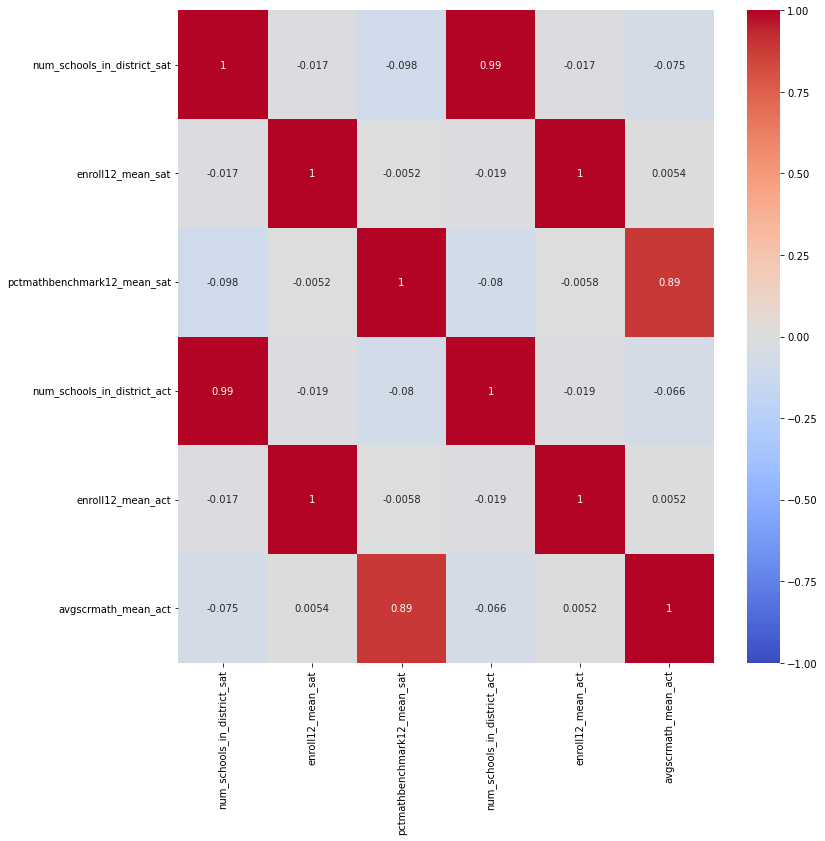

In [80]:
plt.figure(figsize=(12,12))
sns.heatmap(scores_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

plt.savefig("../graphics/heatmap.jpg")

*Interpretation: The above image shows that the strongest correlation is between avgscrmath_mean_act and pctmathbenchmark12_mean_sat. This was expected as it would be expected that districts with lower SAT math benchmark percentages would also have lower ACT Average math scores.*

2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.

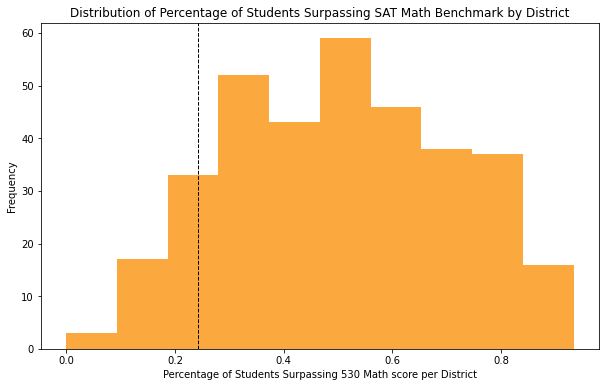

In [81]:
plt.figure(figsize=(10,6))
plt.hist(sat_act_2019_ca['pctmathbenchmark12_mean_sat'], color='#fba83e')
plt.title('Distribution of Percentage of Students Surpassing SAT Math Benchmark by District')
plt.xlabel('Percentage of Students Surpassing 530 Math score per District')
plt.ylabel('Frequency')
plt.axvline(0.242, color='k', linestyle='dashed', linewidth=1);

plt.savefig("../graphics/sathist.jpg")

*Interpretation: The graph above is showing the spread of % of students surpassing the SAT Math Benchmark in CA counties. The histogram shows an approximately normal distribution with a mean value of 50.05% and standard deviation of 20.48%. There do not appear to be any outliers. The School Districts that are of the most interest are those who scored in the bottom 10% which has a cut off percentage of 24.2%. Therefore the school districts with a average benchmark percentage below 24.2% are highlighted by the vertical line on the histogram.* ([*source*](https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib))

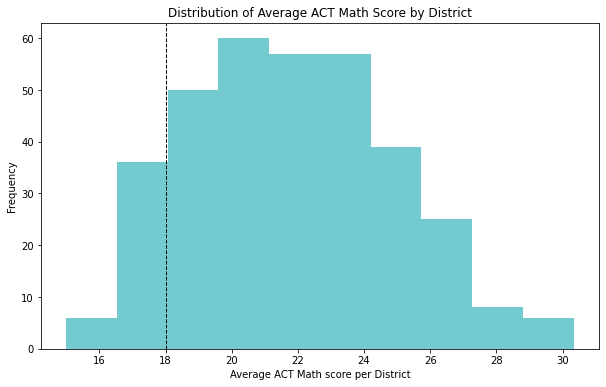

In [82]:
plt.figure(figsize=(10,6))
plt.hist(sat_act_2019_ca['avgscrmath_mean_act'], color='#74cbcf')
plt.title('Distribution of Average ACT Math Score by District')
plt.xlabel('Average ACT Math score per District')
plt.ylabel('Frequency')
plt.axvline(18, color='k', linestyle='dashed', linewidth=1);

plt.savefig("../graphics/acthist.jpg")

*Interpretation: The graph above is showing the spread of Average ACT Math Scores in CA counties. The histogram shows an approximately normal distribution with a mean value of 21.82 and standard deviation of 3.04. There do not appear to be any outliers. The School Districts that are of the most interest are those who scored in the bottom 10% which has a cut off score of 18. Therefore the school districts with mean ACT scores below 18 are highlighted by the vertical line on the histogram.* ([*source*](https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib))

3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels

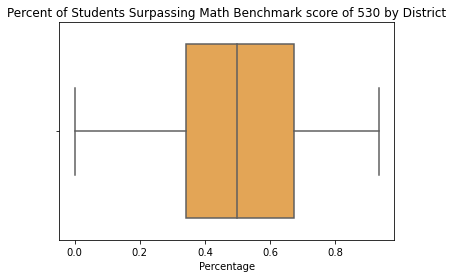

In [83]:
sns.boxplot(x=sat_act_2019_ca['pctmathbenchmark12_mean_sat'], color='#fba83e')
plt.title('Percent of Students Surpassing Math Benchmark score of 530 by District')
plt.xlabel('Percentage');

plt.savefig("../graphics/satbox.jpg")

*Interpretation: The graph above is showing the spread of % of students surpassing the SAT Math Benchmark in CA counties. The boxplot shows symmetric distribution with a median value of 49.82%% and interquartile range of 33.1%. There do not appear to be any outliers.*

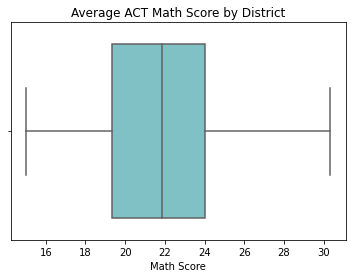

In [84]:
sns.boxplot(x=sat_act_2019_ca['avgscrmath_mean_act'], color='#74cbcf')
plt.title('Average ACT Math Score by District')
plt.xlabel('Math Score');

plt.savefig("../graphics/actbox.jpg")

*Interpretation: The graph above is showing the spread of Average ACT Math Scores in CA counties. The boxplot shows a symmetric distribution with a median value of 21.87 and an Interquartile Range of 4.67. There do not appear to be any outliers.*

4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable

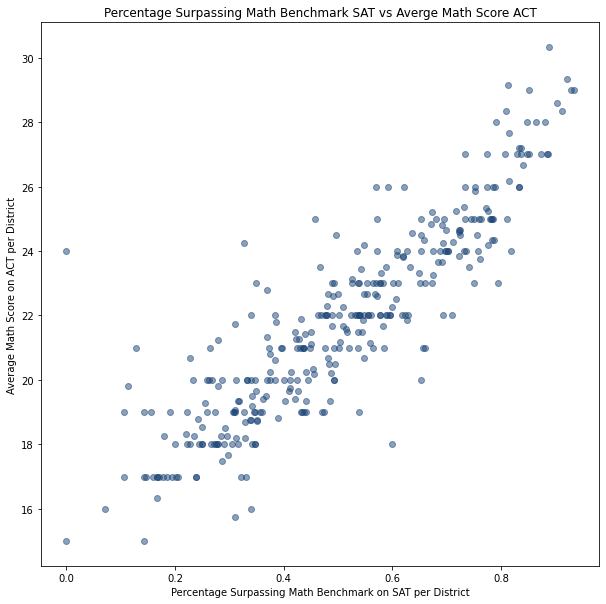

In [85]:
plt.figure(figsize=(10,10))
plt.scatter(sat_act_2019_ca['pctmathbenchmark12_mean_sat'], sat_act_2019_ca['avgscrmath_mean_act'], alpha = 0.5, color = '#1a4477')
plt.title('Percentage Surpassing Math Benchmark SAT vs Averge Math Score ACT')
plt.xlabel('Percentage Surpassing Math Benchmark on SAT per District')
plt.ylabel('Average Math Score on ACT per District');

plt.savefig("../graphics/satvsactscatter.jpg")

*Interpretation: The image above shows, as expected, there is a strong positive direction for the relationship between Percent of students per district surpassing the 530 SAT Math benchmark score and the Avg ACT Math score per district.*

5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Seeing a visual of the bottom 10% of school districts SAT math benchmark percentages on a horizontal bar graph would be helpful.

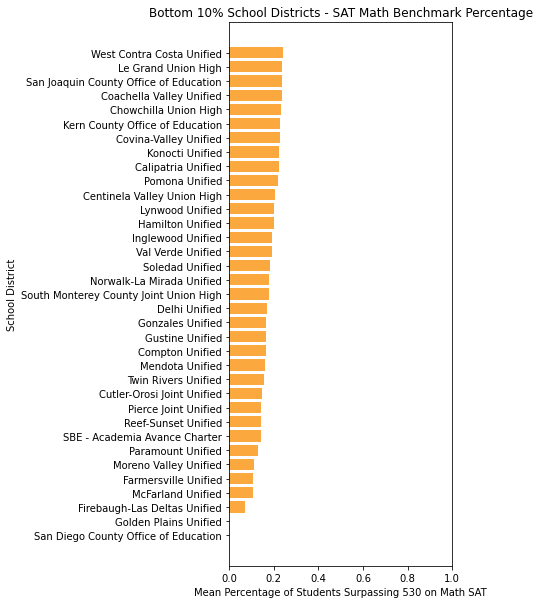

In [86]:
bottom_ten_sat
plt.figure(figsize=(4,10))
plt.barh(bottom_ten_sat['dname'], bottom_ten_sat['pctmathbenchmark12_mean_sat'], color='#fba83e')
plt.title('Bottom 10% School Districts - SAT Math Benchmark Percentage')
plt.ylabel('School District')
plt.xlabel('Mean Percentage of Students Surpassing 530 on Math SAT')
plt.xlim(0, 1);

plt.savefig("../graphics/bottom10satbar.jpg")

*Interpretation: Notice that the Golden Plains Unified and San Diego County Office of Education have 0.00, this is accurate as those districts do have high schools. This means those districts had 0% passing the SAT Math Benchmark.*

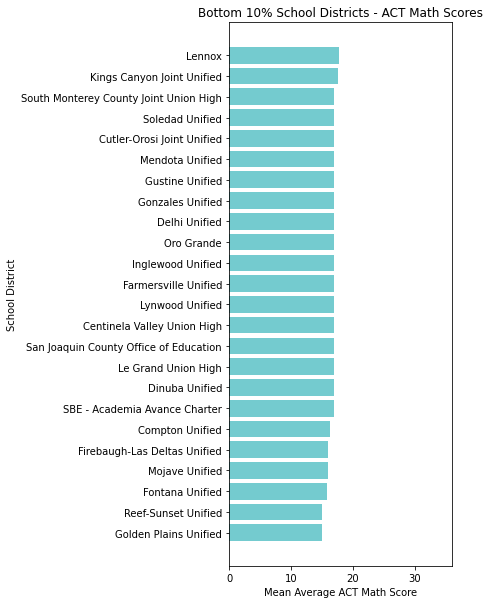

In [87]:
bottom_ten_act
plt.figure(figsize=(4,10))
plt.barh(bottom_ten_act['dname'], bottom_ten_act['avgscrmath_mean_act'], color='#74cbcf')
plt.title('Bottom 10% School Districts - ACT Math Scores')
plt.ylabel('School District')
plt.xlabel('Mean Average ACT Math Score')
plt.xlim(0, 36);

plt.savefig("../graphics/bottom10actbar.jpg")

*Interpretation: The bar graph above displays the School Districts whose Average Math ACT scores were in the bottom 10% for 2019.*

For the sake of comparison, let's look at the top 10% of schools bar graph. 

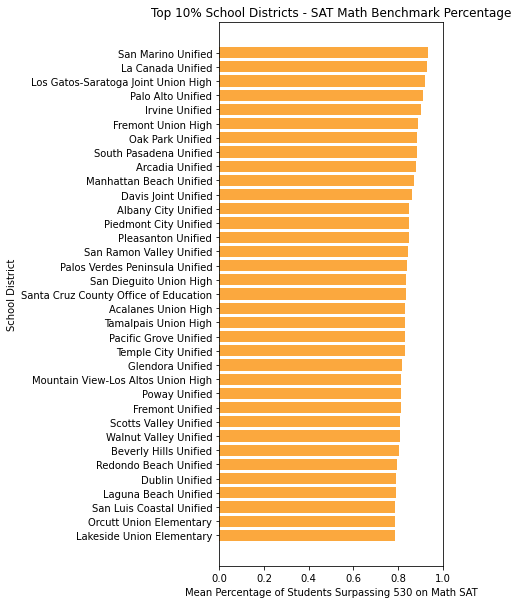

In [88]:
top_ten_sat_sort
plt.figure(figsize=(4,10))
plt.barh(top_ten_sat_sort['dname'], top_ten_sat_sort['pctmathbenchmark12_mean_sat'], color='#fba83e')
plt.title('Top 10% School Districts - SAT Math Benchmark Percentage')
plt.ylabel('School District')
plt.xlabel('Mean Percentage of Students Surpassing 530 on Math SAT')
plt.xlim(0, 1);

plt.savefig("../graphics/top10satbar.jpg")

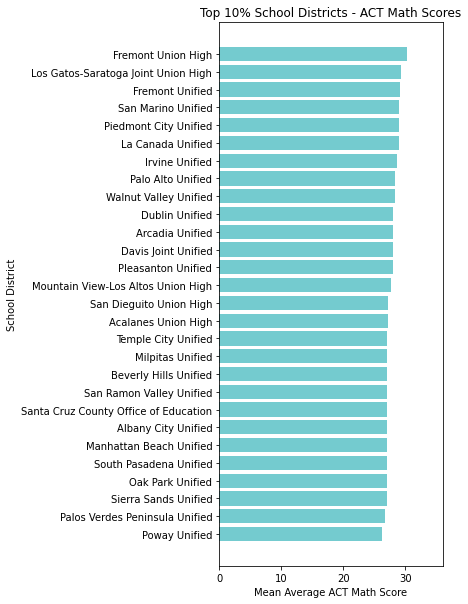

In [89]:
top_ten_act_sort
plt.figure(figsize=(4,10))
plt.barh(top_ten_act_sort['dname'], top_ten_act_sort['avgscrmath_mean_act'], color='#74cbcf')
plt.title('Top 10% School Districts - ACT Math Scores')
plt.ylabel('School District')
plt.xlabel('Mean Average ACT Math Score')
plt.xlim(0, 36);

plt.savefig("../graphics/top10actbar.jpg")

The code from ([*source*}](https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis)) was used to help create the graph below.
Below the legends were moved to be on the respective side of their y-axis. ([*source*](https://matplotlib.org/2.0.2/users/legend_guide.html))

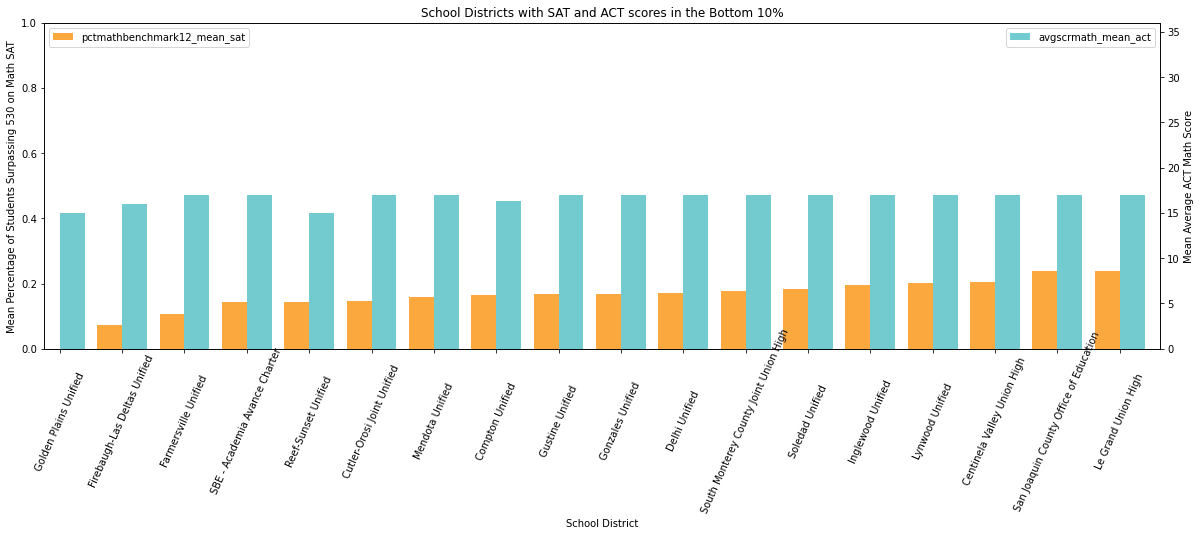

In [90]:
fig = plt.figure(figsize=(20,6))

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

bottom_ten_merge.pctmathbenchmark12_mean_sat.plot(kind='bar', color='#fba83e', ax=ax, width=width, position=1)
bottom_ten_merge.avgscrmath_mean_act.plot(kind='bar', color='#74cbcf', ax=ax2, width=width, position=0)

ax.set_ylim(0, 1)
ax2.set_ylim(0, 36)
ax.set_xticklabels(bottom_ten_merge['dname'],rotation=66, ha = "center", va="center", position=(0,-0.2))
ax.set_xlabel("School District")
ax.set_ylabel('Mean Percentage of Students Surpassing 530 on Math SAT')
ax2.set_ylabel('Mean Average ACT Math Score');
ax.legend(loc=2)
ax2.legend(loc=1)

plt.title('School Districts with SAT and ACT scores in the Bottom 10%')

plt.savefig("../graphics/sat_act_merge_bottom10_bar.jpg")

plt.show()

*Interpretation: The graph above shows the School Districts with SAT and ACT scores in the bottom 10% of California. The left vertical axis corresponds to the Percentage of Students whose SAT Math Score surpassed the benchmark for 530. The right vertical axis corresponds to the Average ACT Math Score for each school District. The color legend is located on the respective side.*  

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

As California moves to a new mathematics framework where students will be 'de-tracked' and placed in one level per mathematics classes, this will increase the diversity in math classrooms. Using the 2019 SAT and ACT results for California school districts, the specific school districts that have scored in the bottom 10% will be identified to provide extra resources. In order to adequately compare, only 12th grade test takers were analyzed. While the data provided for 2019 does not give explicit SAT Math scores, we were able to identify the average percentage of students who surpassed the California benchmark SAT Math score of 530 for each school district. The ACT data did provide an average math score. 

Data was analyzed to identify the school districts in the bottom 10% for each of SAT Math Benchmark Percenages for 12th graders and ACT Average Math Score for 12th graders. The final list of recommended school districts include those that appeared in both the bottom SAT and bottom ACT list. 

It is our recommendation the the following school districts are looked at further to determine what resources or funds would be beneficial in order to in order to successfully implement the new California Mathematics Framework: Centinela Valley Union High, Compton Unified, Cutler-Orosi Joint Unified, Delhi Unified, Farmersville Unified, Firebaugh-Las Deltas Unified, Golden Plains Unified, Gonzales Unified, Gustine Unified, Inglewood Unified, Le Grand Union High, Lynwood Unified, Mendota Unified, Reef-Sunset Unified, SBE - Academia Avance Charter, San Joaquin County Office of Education, Soledad Unified, and South Monterey County Joint Union High.